## Census Income Prediction

## Description of fnlwgt (final weight)


The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Columns:

1. age - the age of an individual
2. workclass - a general term to represent the employment status of an individual
3. final weight - in other words, this is the number of people the census believes the entry represents
4. education - the highest level of education achieved by an individual
5. education_num - the highest level of education achieved in numerical form.
6. marital_status - marital status of an individual. Married civ spouse corresponds to a civilian spouse while Married AF spouse is a spouse in the Armed Forces
7. occupation - the general type of occupation of an individual
8. relationship - represents what this individual is relative to others
9. race - descriptions of an individual’s race
10. sex - the biological sex of the individual
11. capital_gain - capital gains for an individual
12. capital_loss - capital loss for an individual
13. hours_per_week - the hours an individual has reported to work per week continuous
14. income - whether or not an individual makes more than 50,000 dollars annually (the label)

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

import joblib
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df=pd.read_csv('census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Rows: 32560 Columns: 15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


This shows the complete informaton about the dataset , here we have total 15 data Columns with 32560 entries and dataset is in the form of DataFrame

In [6]:
#Lets check the  Datatypes of each column
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Here we have int64(6), object(9) Columns.

In [7]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

Here Income is our target column and we have 24719 whose income are less than and equal to 50k and 7841 are those whose income are more than that

In [8]:
# Checking the counts of label categories
income = df['Income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

 <=50K    75.92 %
 >50K     24.08 %
Name: Income, dtype: object

The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.

In [9]:
# Statistical summary
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


From here we can see the Min and Max value of the numerical columns and also 

we can compare the Mean and Median of the columns 

and also compare the 75% and Max value and here we can see that some columns have very high difference in between 75% and Max value that means outliers are present

##  Exploratory Data Analysis

#### Univariate Analysis:

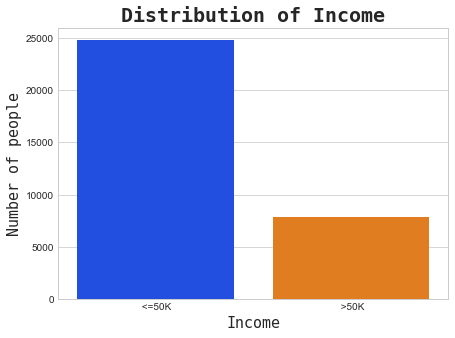

In [10]:
# Creating a barplot for 'Income'
income = df['Income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here we can see that the data is highly imbalanced as no of people of income less than 50k are very much

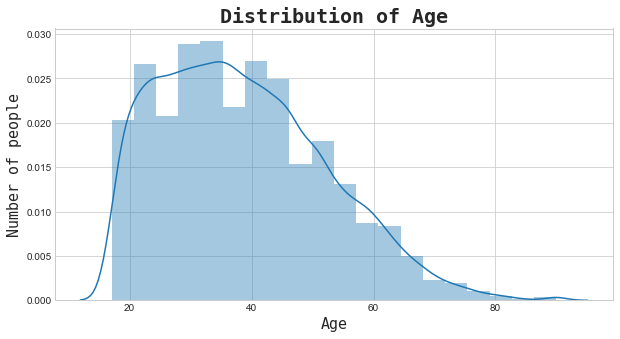

In [11]:
# Creating a distribution plot for 'Age'
age = df['Age'].value_counts()

plt.figure(figsize=(10, 5))
sns.distplot(df['Age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Here we can see that Average age of people is inbetween 20 to 40 years

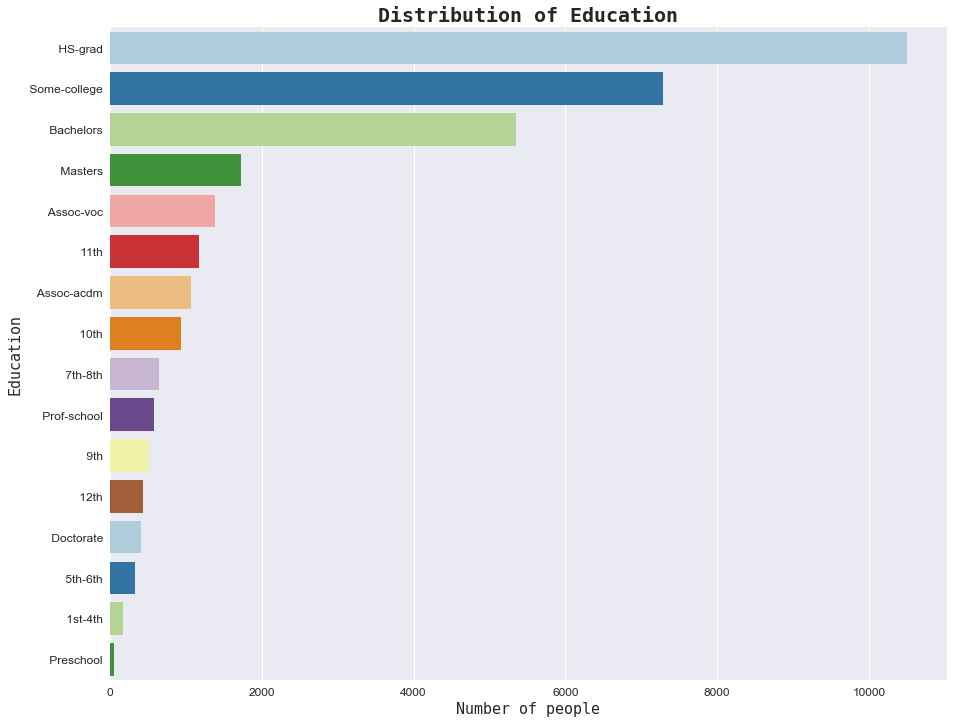

In [12]:
# Creating a barplot for 'Education'
edu = df['Education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(15, 12))
sns.barplot(x=edu.values, y=edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Here we can see the distribution of Eductaion where HS-grad are very high and then Some college passouts

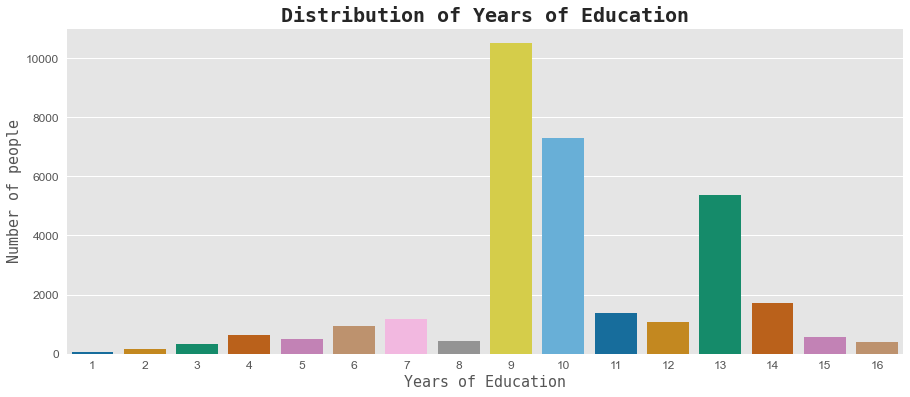

In [13]:
# Creating a barplot for 'Years of Education'
edu_num = df['Education_num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(15, 6))
sns.barplot(x=edu_num.index, y=edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

In [14]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

As we see above that max no. of people have education untill High school and here we can see that Years of Eduction is high for 9 Years and 10 years

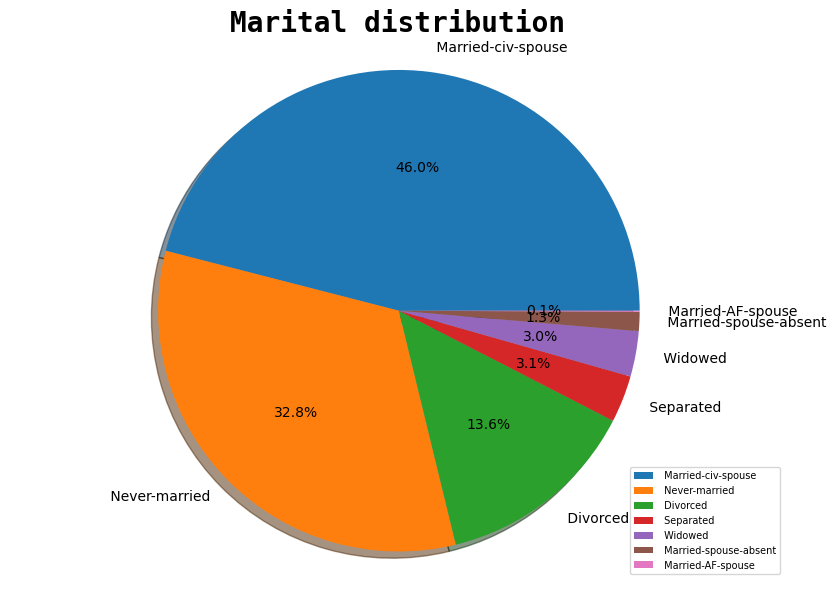

In [15]:
# Creating a pie chart for 'Marital status'
marital = df['Marital_status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index,shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

Most of the people are those who are  married to civilian spouse and after that those who never married in their life.

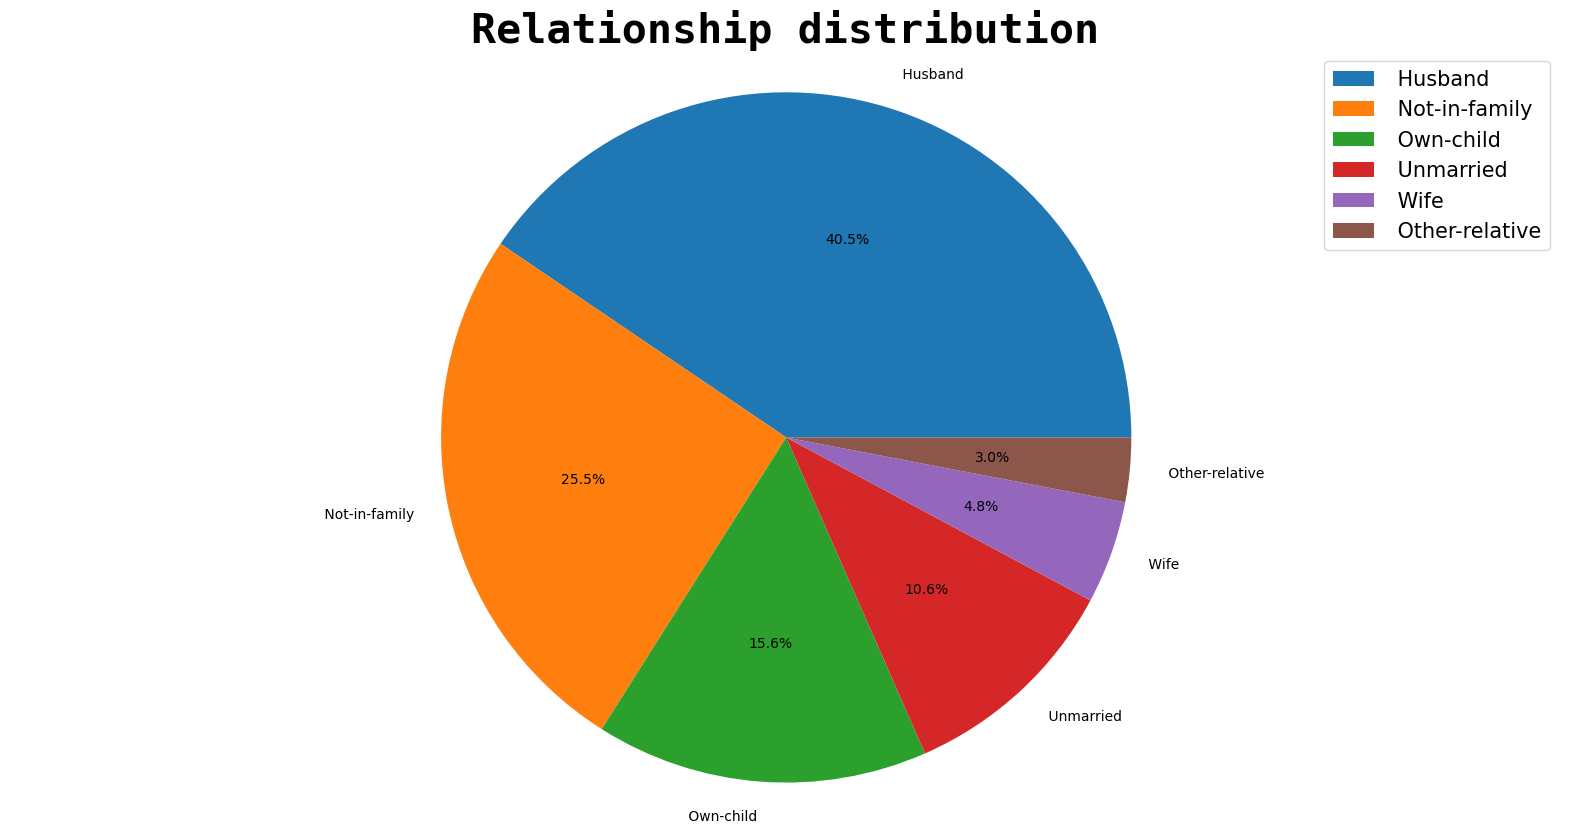

In [16]:
# Creating a donut chart for 'Relationship'
relation = df['Relationship'].value_counts()
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
         autopct='%1.1f%%')

plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()


Here we can see that Max number of relationship distribution are of Husband and then those who are not in family

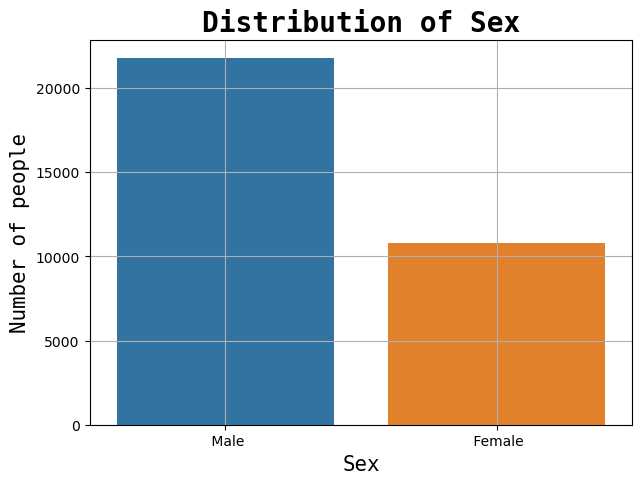

In [17]:
# Creating a barplot for 'Sex'
sex = df['Sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

Here we can see that the Numbers of male are very high incomparison to Female

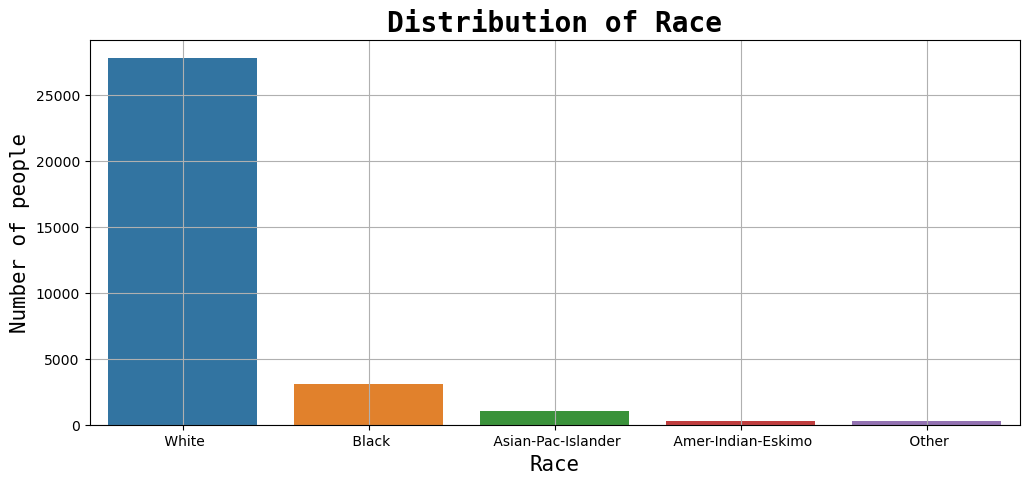

In [18]:
# Creating a barplot for 'Race'
race = df['Race'].value_counts()

plt.figure(figsize=(12, 5))
sns.barplot(race.index, race.values)
plt.title('Distribution of Race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

Here we can see that the distribution of race where the number of white peoples are very high.

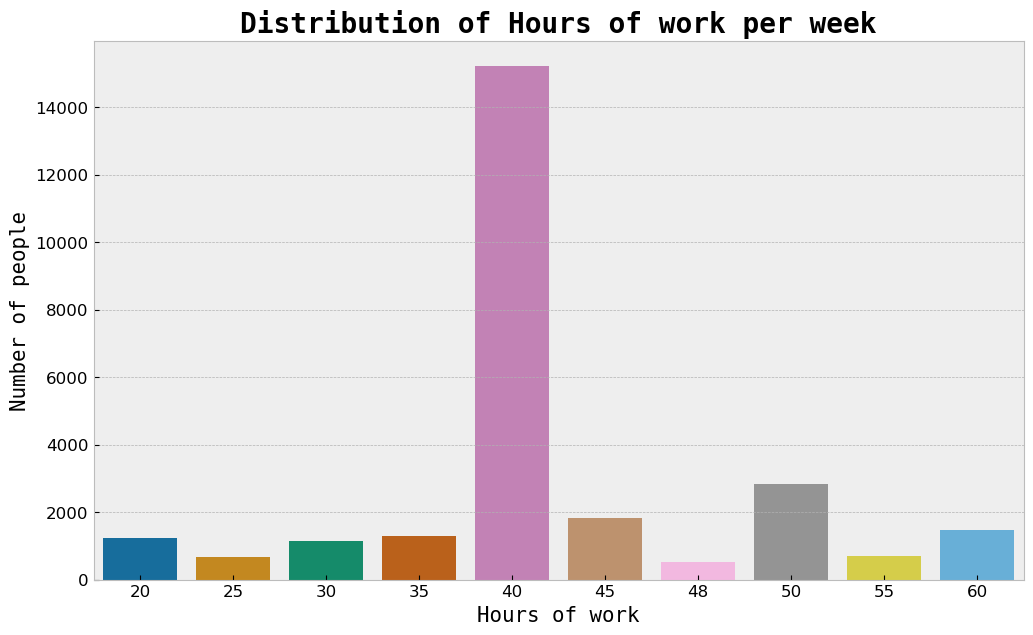

In [19]:
# Creating a barplot for 'Hours per week'
hours = df['Hours_per_week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(12, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Here we can see that the maximum number of working hours per week are 40 hours.

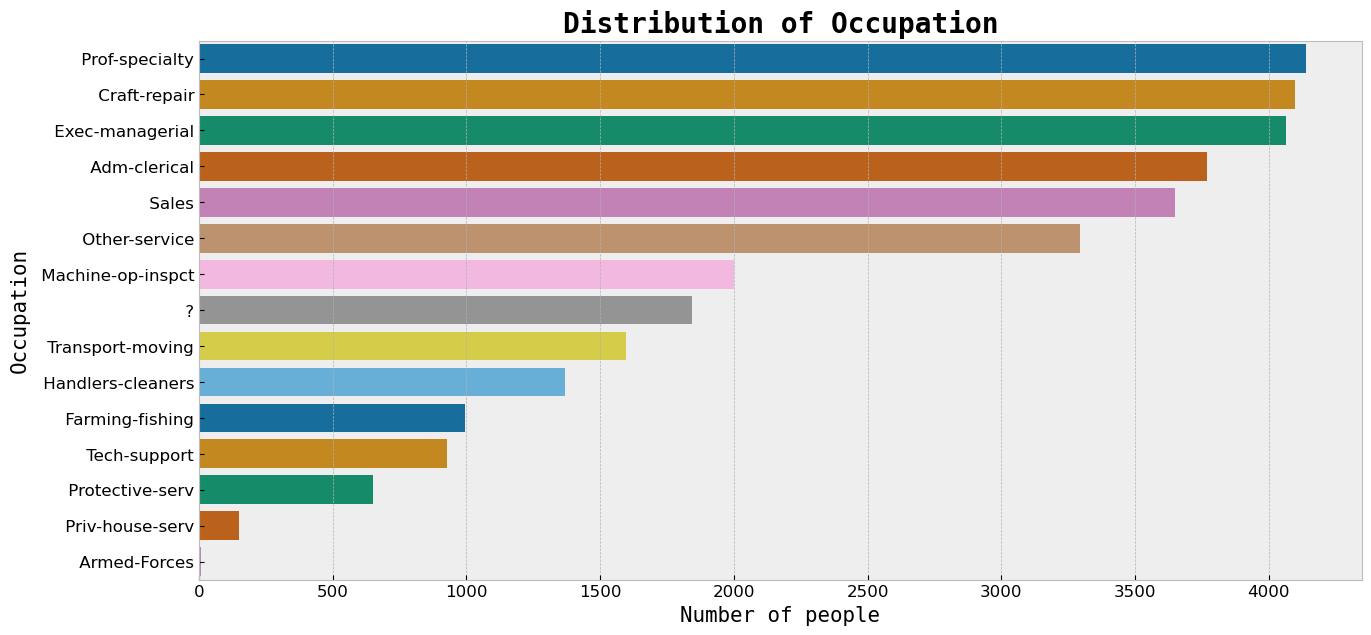

In [20]:
# Creating a barplot for 'Occupation'
occp = df['Occupation'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(occp.values, occp.index, palette='colorblind')
plt.title('Distribution of Occupation', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Occupation', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Here we can see that the Max number of occupation are Prof-speciality and Craft-repair.

#### Bivariate Analysis

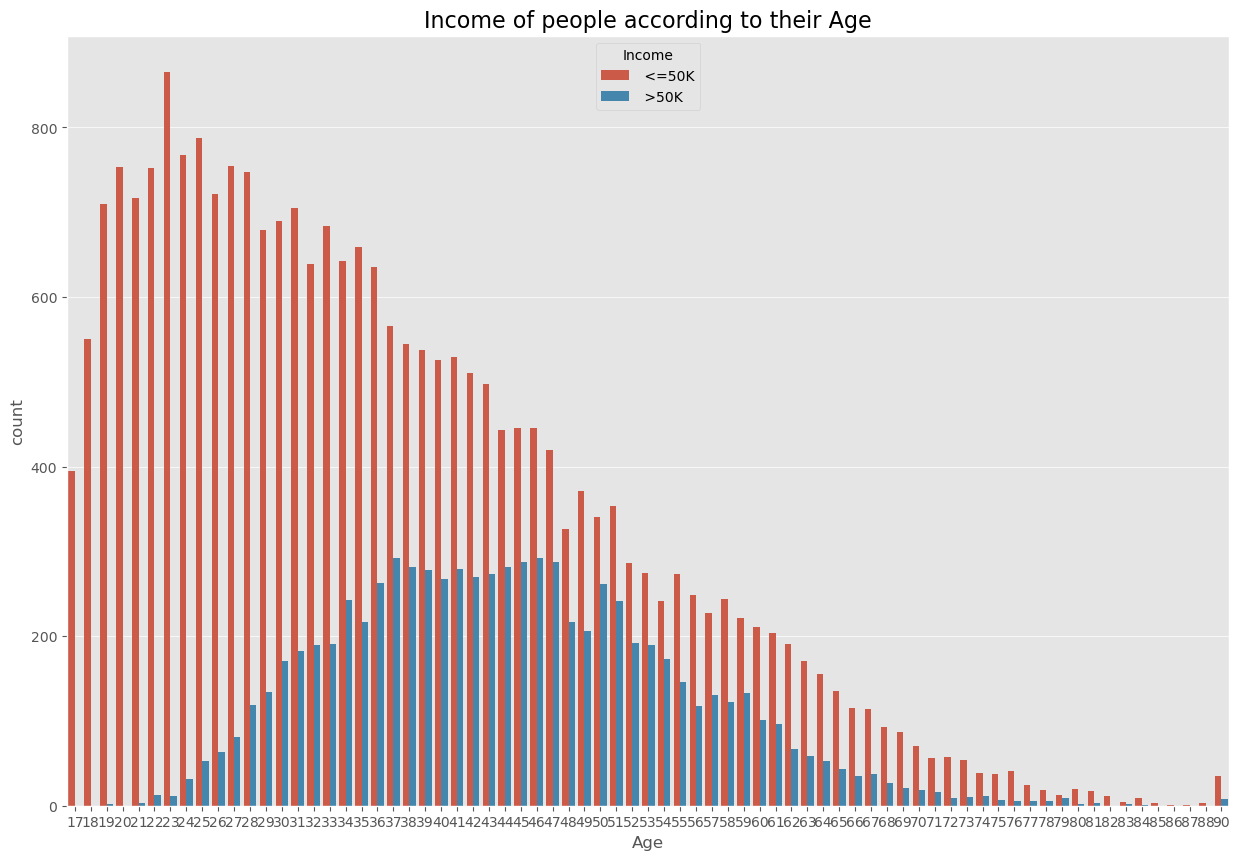

In [21]:
plt.style.use('ggplot')
plt.figure(figsize = (15,10))
plt.title("Income of people according to their Age", fontsize = 16)
sns.countplot(x = df['Age'], hue = df['Income'])
plt.show()

Here we can see that people Age between 17 to 44 years have income less than 50k

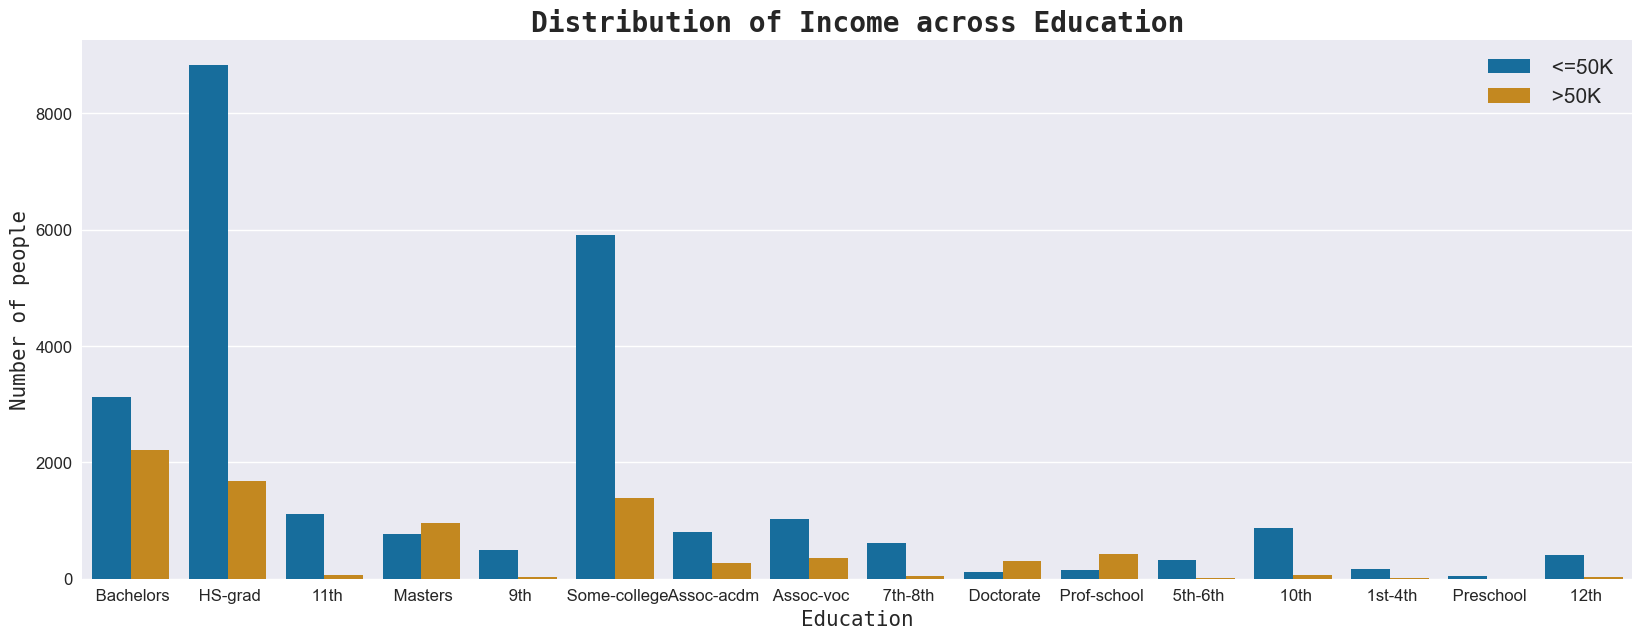

In [22]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['Education'],
              hue=df['Income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

The Hs-grad peoples are max. peoples who have salary less than 50k and after that Some college pass people where as Bachelors pass people have high sa;ary i.e more number of people have salary greater than 50k

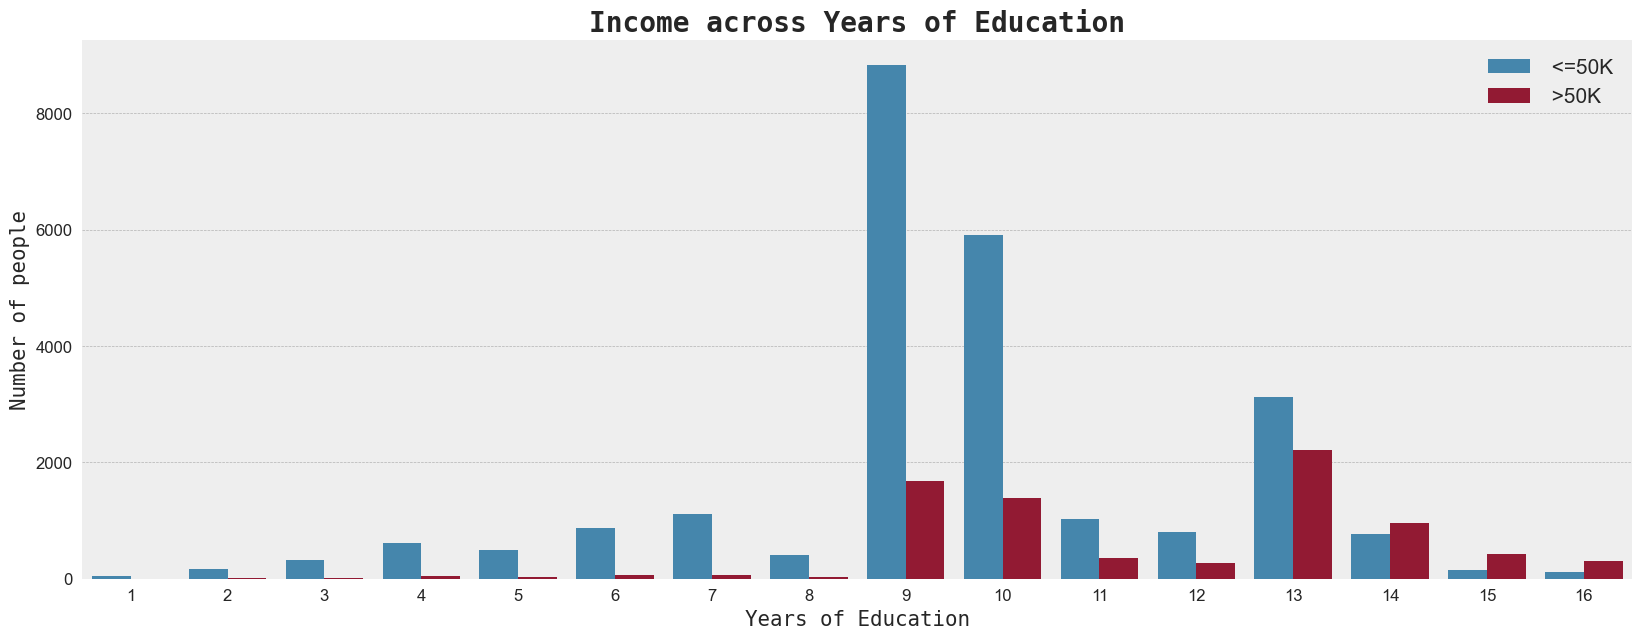

In [23]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(df['Education_num'],
              hue=df['Income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

People who have 9 years of Education most likely to have income less than 50k while people who have 13 years of education have income more than 50k

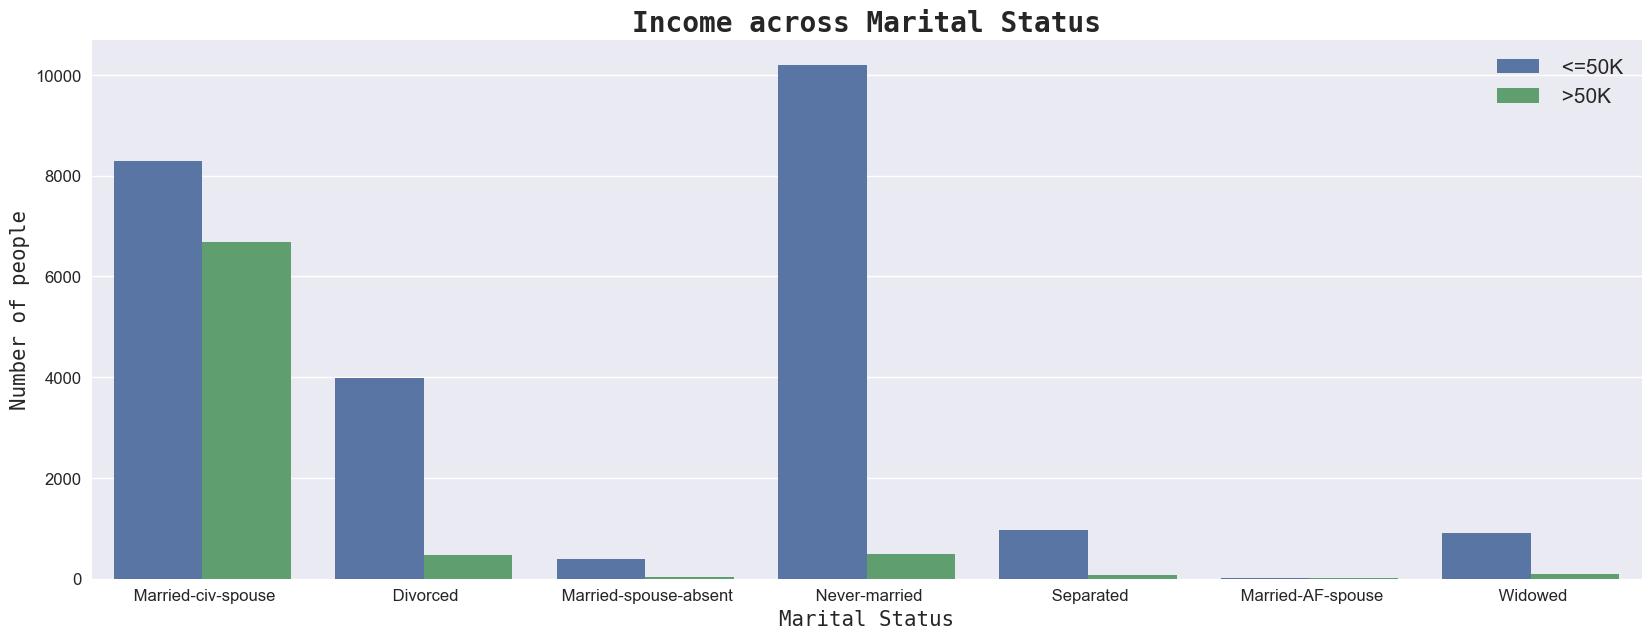

In [24]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df['Marital_status'], hue=df['Income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

Those people who are not married have income less than 50k while those people who are married to civilian spouse have higher rate income incomparsion to others.

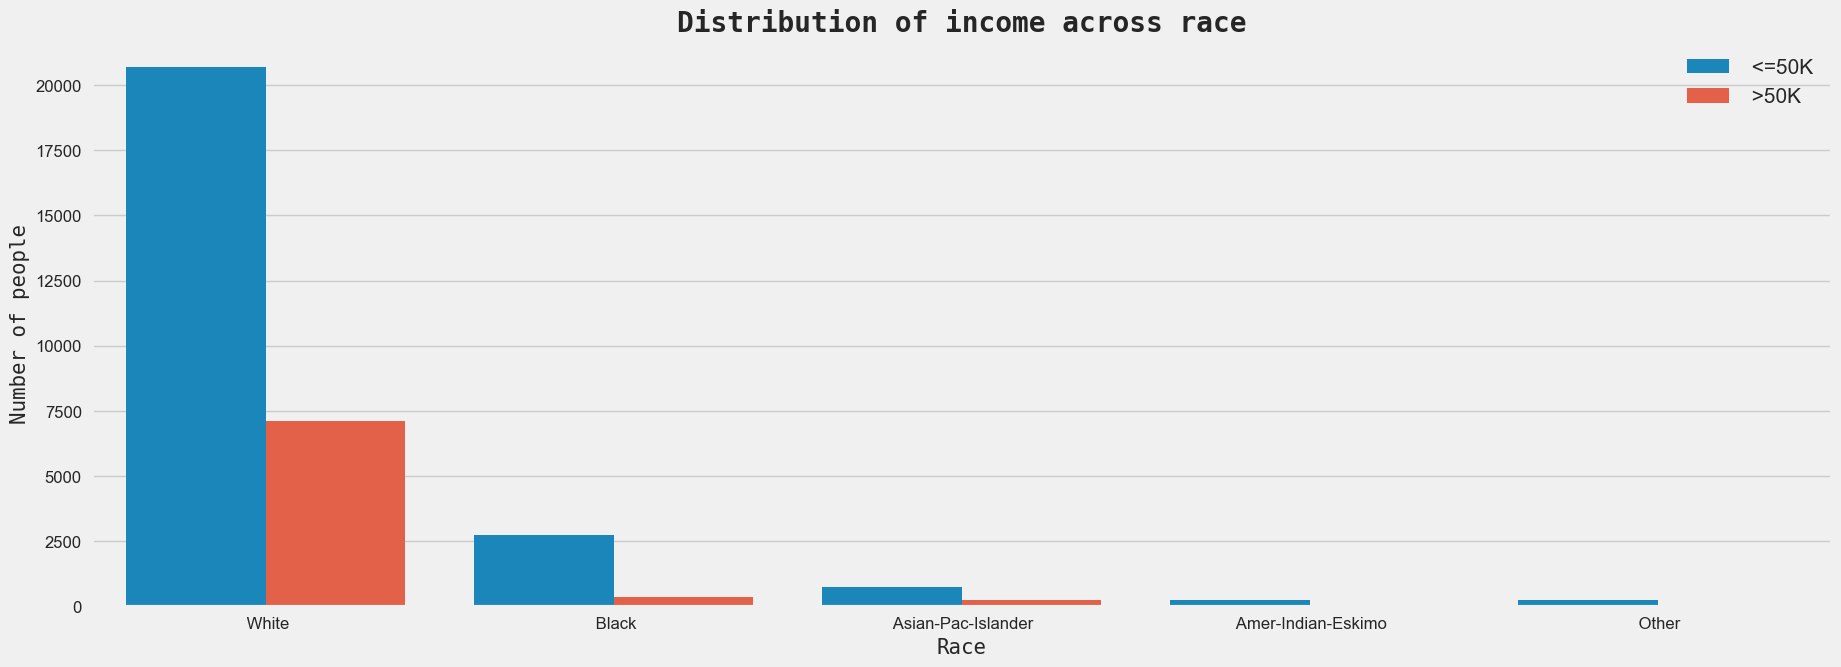

In [25]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(df['Race'], hue=df['Income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

Here we can see that the white people are very high who have income more than 50k incomparsion of other people.

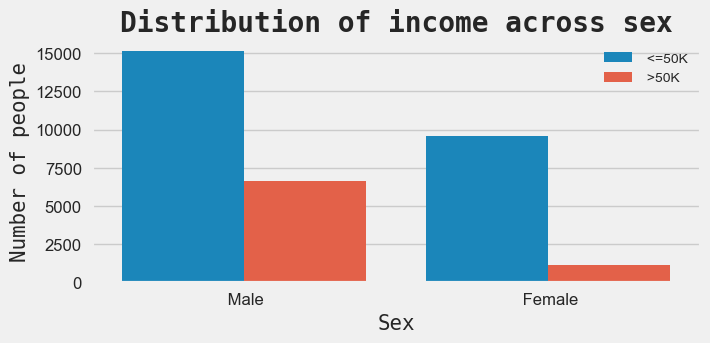

In [26]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(df['Sex'], hue=df['Income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.show()


Here we can see that the according to the gender the Male have the higher rate of Income i.e Male are more who ave income More than the 50k while female are very less.

#### Multivariate Analysis

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Income'] = le.fit_transform(df['Income'])

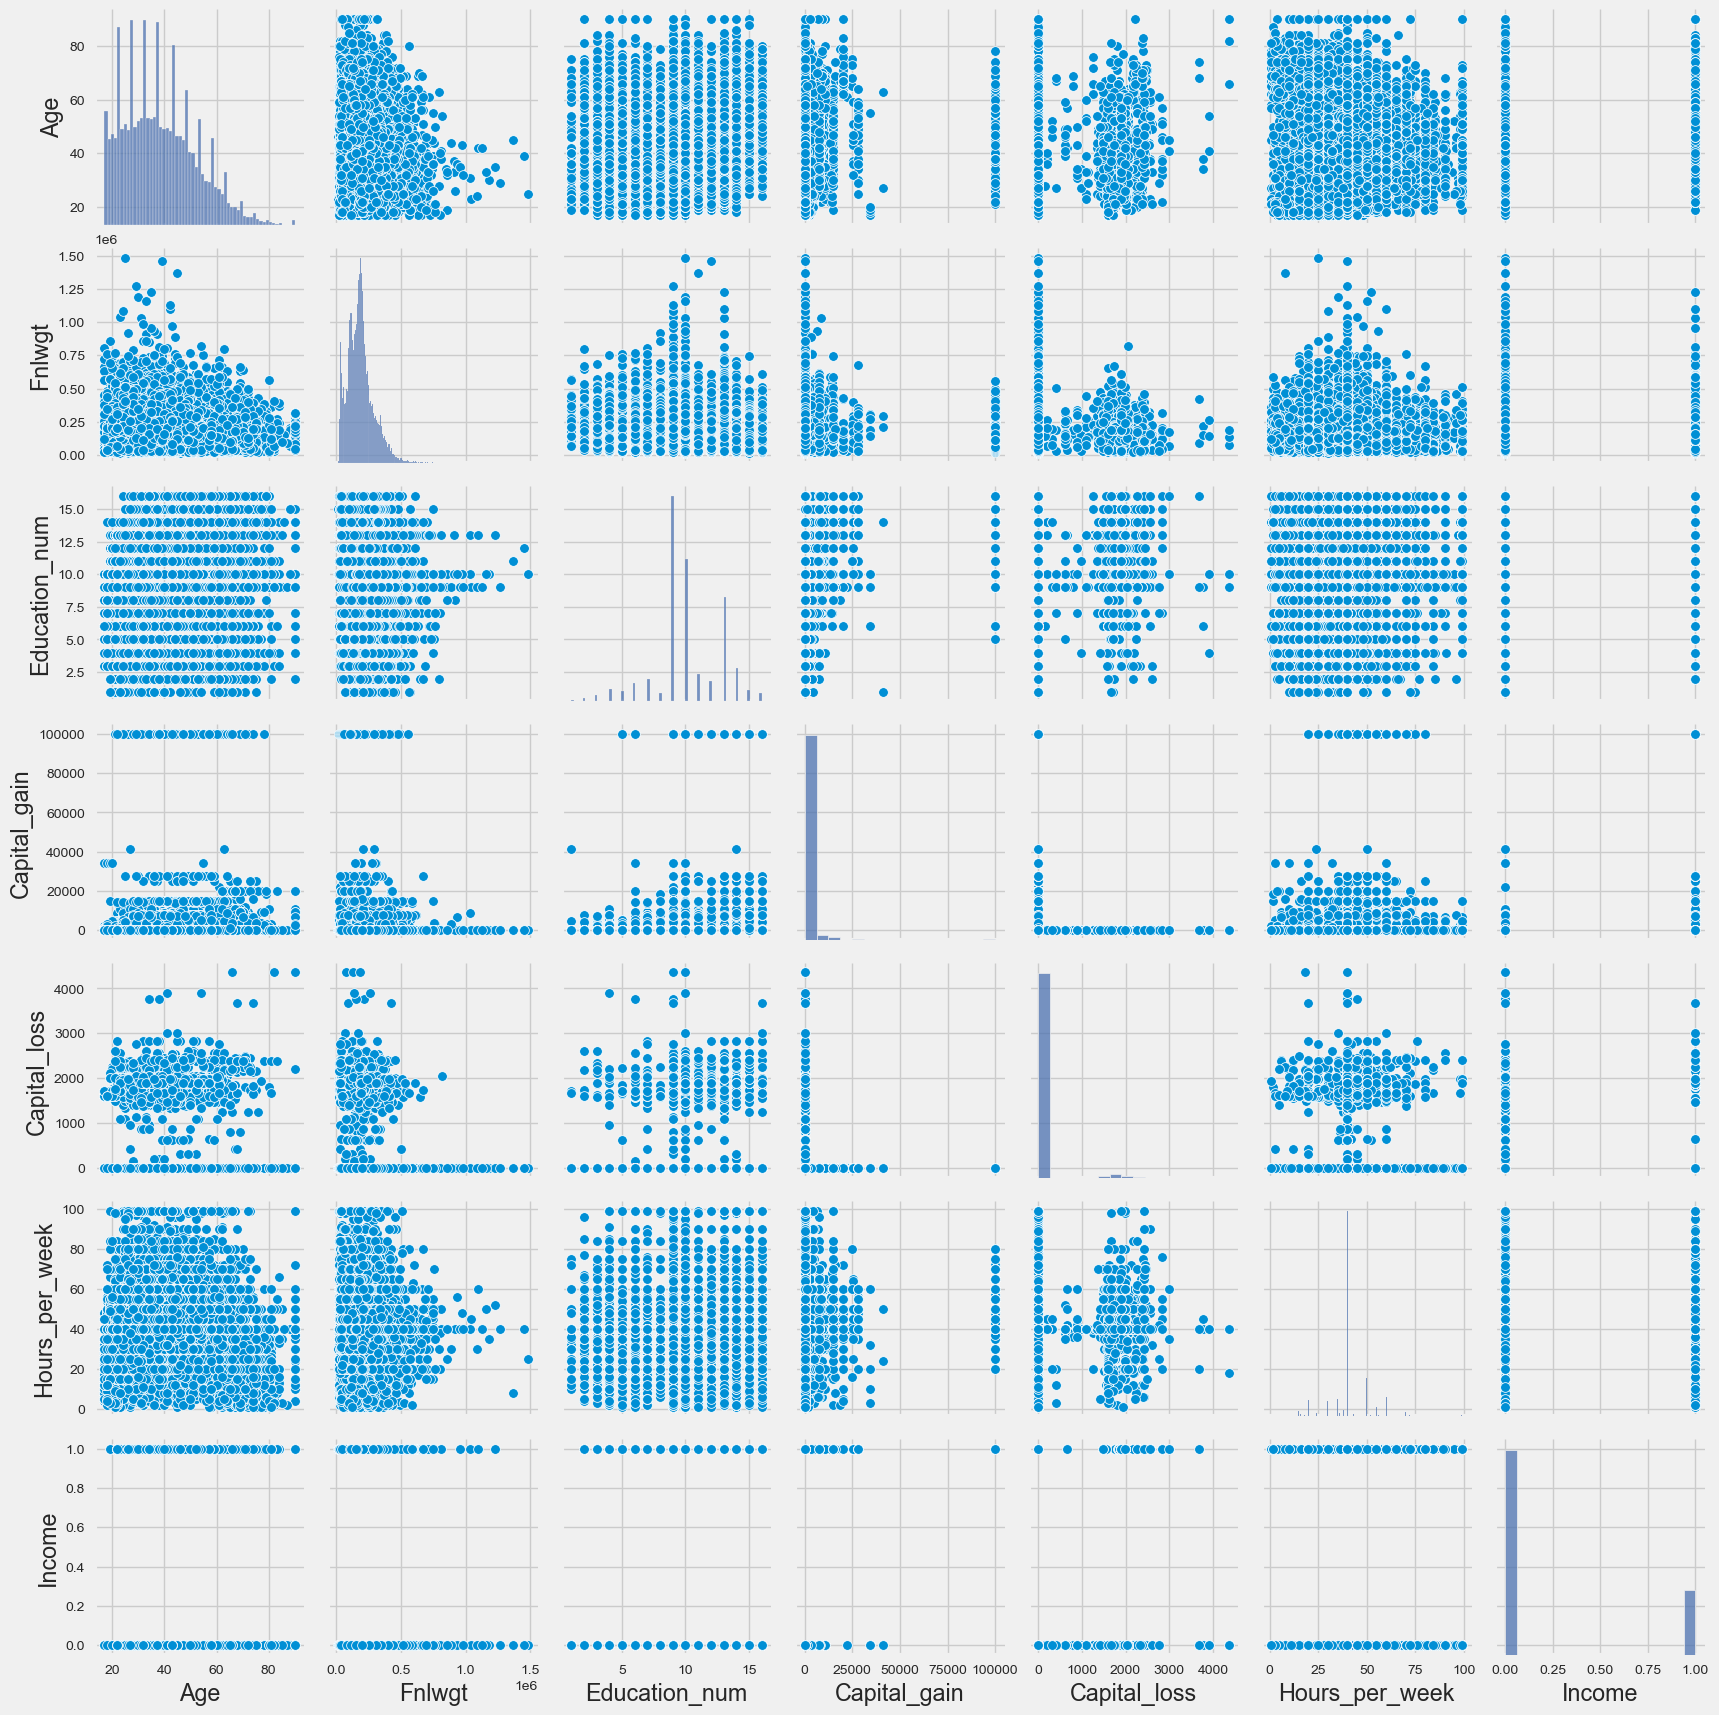

In [28]:
# Creating a pairplot of dataset
sns.pairplot(df)
plt.show()

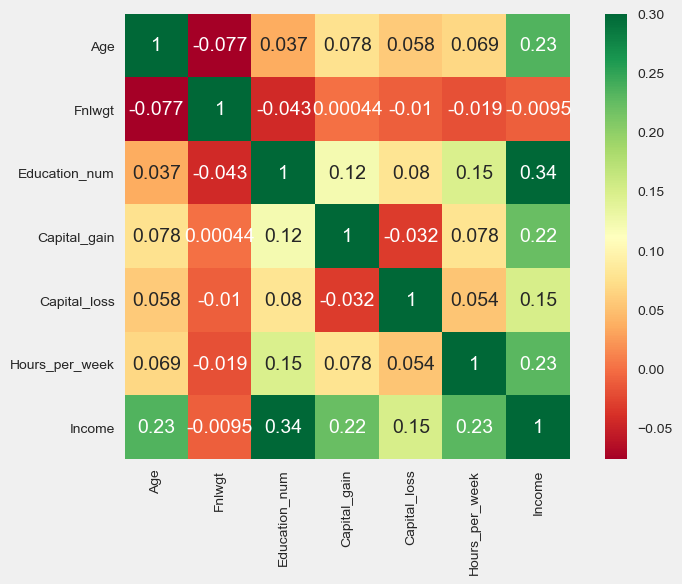

In [29]:
corr = df.corr()
sns.heatmap(corr, vmax=.3, square=True,annot=True, cmap='RdYlGn')
plt.show()

From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.

### Data Preprocessing

#### Fixing '?' values in the dataset

In [30]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [31]:
df['Workclass'] = df['Workclass'].map(lambda x: np.nan if x=="?"  else x)

In [32]:
df['Occupation'] = df['Occupation'].map(lambda x: np.nan if x=="?"  else x)

In [33]:
df['Native_country'] = df['Native_country'].map(lambda x: np.nan if x=="?"  else x)

In [34]:
df.mode()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,0.0
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To fill the null values we can use the mode function and from here we can see that in workclass we can fill Private , Similarly in we can fill Prof-speciality and in Native-country we can fill United States

In [35]:
df["Workclass"]=df["Workclass"].fillna("Private")
df["Occupation"]=df["Occupation"].fillna("Prof-specialty")
df["Native_country"]=df["Native_country"].fillna("United-States")


Handling missing data with their "modes" of respective coloumn cause of categorical data.

In [36]:
df['Workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [37]:
df['Occupation'].value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

In [38]:
df["Native_country"].value_counts()

United-States                 29752
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [39]:
 df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Hence no missing and null values are present in the datatset

In [40]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution

skew=['Fnlwgt','Age','Capital_gain','Capital_loss','Hours_per_week']

for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
    else:
        df.skew().loc[col]<-0.55
        df[col]=np.cbrt(df[col])

In [41]:
df.skew()

Age              -0.113322
Fnlwgt           -0.842559
Education_num    -0.311630
Capital_gain      3.096803
Capital_loss      4.307460
Hours_per_week   -1.451275
Income            1.212383
dtype: float64

Almost from every column skewness is removed. Some are the feature of the data.

####  Label Encoding

In [42]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

#### Removing Outliers:

Outliers:

We check if any outliers are present in the continous attributes of the dataset. We check it both by visualisations and the zscore for the continous columns.

Age               AxesSubplot(0.08,0.703913;0.15x0.176087)
Workclass         AxesSubplot(0.26,0.703913;0.15x0.176087)
Fnlwgt            AxesSubplot(0.44,0.703913;0.15x0.176087)
Education         AxesSubplot(0.62,0.703913;0.15x0.176087)
Education_num      AxesSubplot(0.8,0.703913;0.15x0.176087)
Marital_status    AxesSubplot(0.08,0.492609;0.15x0.176087)
Occupation        AxesSubplot(0.26,0.492609;0.15x0.176087)
Relationship      AxesSubplot(0.44,0.492609;0.15x0.176087)
Race              AxesSubplot(0.62,0.492609;0.15x0.176087)
Sex                AxesSubplot(0.8,0.492609;0.15x0.176087)
Capital_gain      AxesSubplot(0.08,0.281304;0.15x0.176087)
Capital_loss      AxesSubplot(0.26,0.281304;0.15x0.176087)
Hours_per_week    AxesSubplot(0.44,0.281304;0.15x0.176087)
Native_country    AxesSubplot(0.62,0.281304;0.15x0.176087)
Income             AxesSubplot(0.8,0.281304;0.15x0.176087)
dtype: object

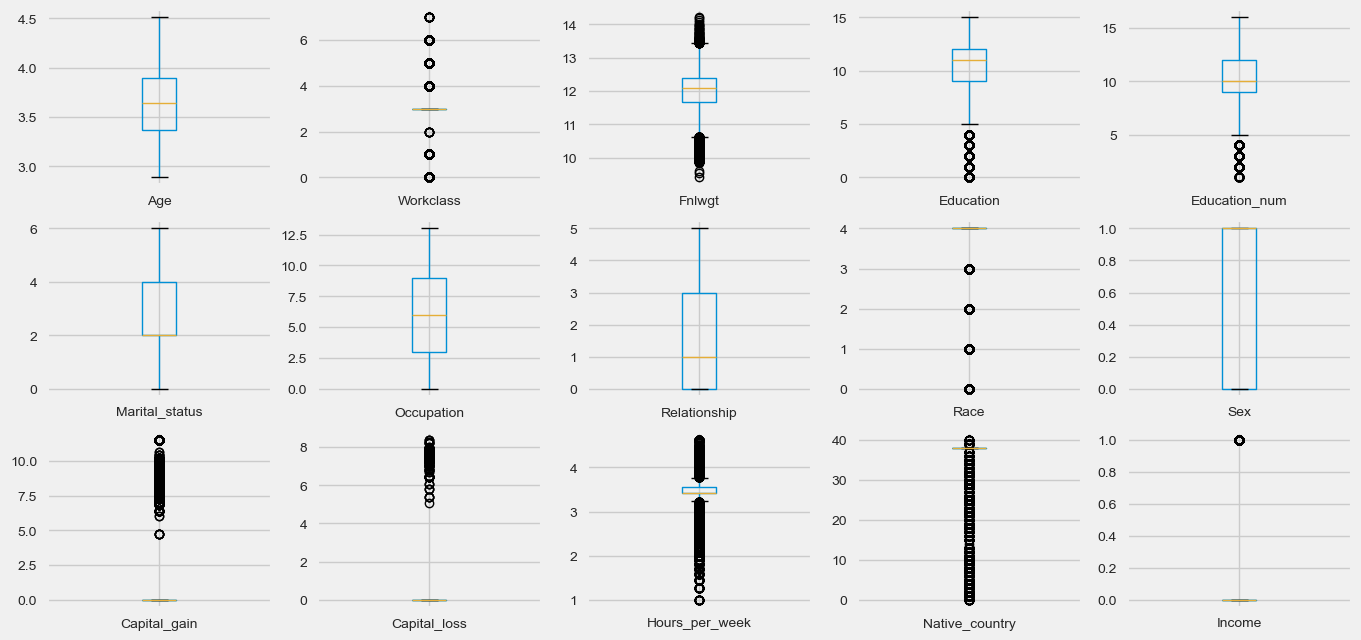

In [43]:
#Plotting the boxplot of each coumn to check the outliers
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

As we can see Outliers are present in the continous columns of the feature. We will check the z-score of the features and and clip them from the data.

In [44]:
from scipy.stats import zscore
zabs = np.abs(zscore(df))
print(np.shape(np.where(zabs >= 3)))
df_new = df[(zabs < 3).all(axis = 1)]
df_new

(2, 7317)


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,3.931826,5,11.330348,9,13,2,3,0,4,1,0.0,0.0,2.351335,38,0
1,3.663562,3,12.281398,11,9,0,5,1,4,1,0.0,0.0,3.419952,38,0
2,3.988984,3,12.366157,1,7,2,5,0,2,1,0.0,0.0,3.419952,38,0
4,3.637586,3,12.558780,12,14,2,3,5,4,0,0.0,0.0,3.419952,38,0
5,3.912023,3,11.984103,6,5,3,7,1,2,0,0.0,0.0,2.519842,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,3.135494,3,12.644821,15,10,4,10,1,4,1,0.0,0.0,3.419952,38,0
32555,3.332205,3,12.458010,7,12,2,12,5,4,0,0.0,0.0,3.361975,38,0
32556,3.713572,3,11.947140,11,9,2,6,0,4,1,0.0,0.0,3.419952,38,1
32557,4.077537,3,11.931050,11,9,6,0,4,4,0,0.0,0.0,3.419952,38,0


WE have a total of 7317 outliers in the data. After removing the outliers, we have 25925    observations left.

In [45]:
df.shape

(32560, 15)

In [46]:
df=df_new

In [47]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,3.931826,5,11.330348,9,13,2,3,0,4,1,0.0,0.0,2.351335,38,0
1,3.663562,3,12.281398,11,9,0,5,1,4,1,0.0,0.0,3.419952,38,0
2,3.988984,3,12.366157,1,7,2,5,0,2,1,0.0,0.0,3.419952,38,0
4,3.637586,3,12.558780,12,14,2,3,5,4,0,0.0,0.0,3.419952,38,0
5,3.912023,3,11.984103,6,5,3,7,1,2,0,0.0,0.0,2.519842,22,0


[]

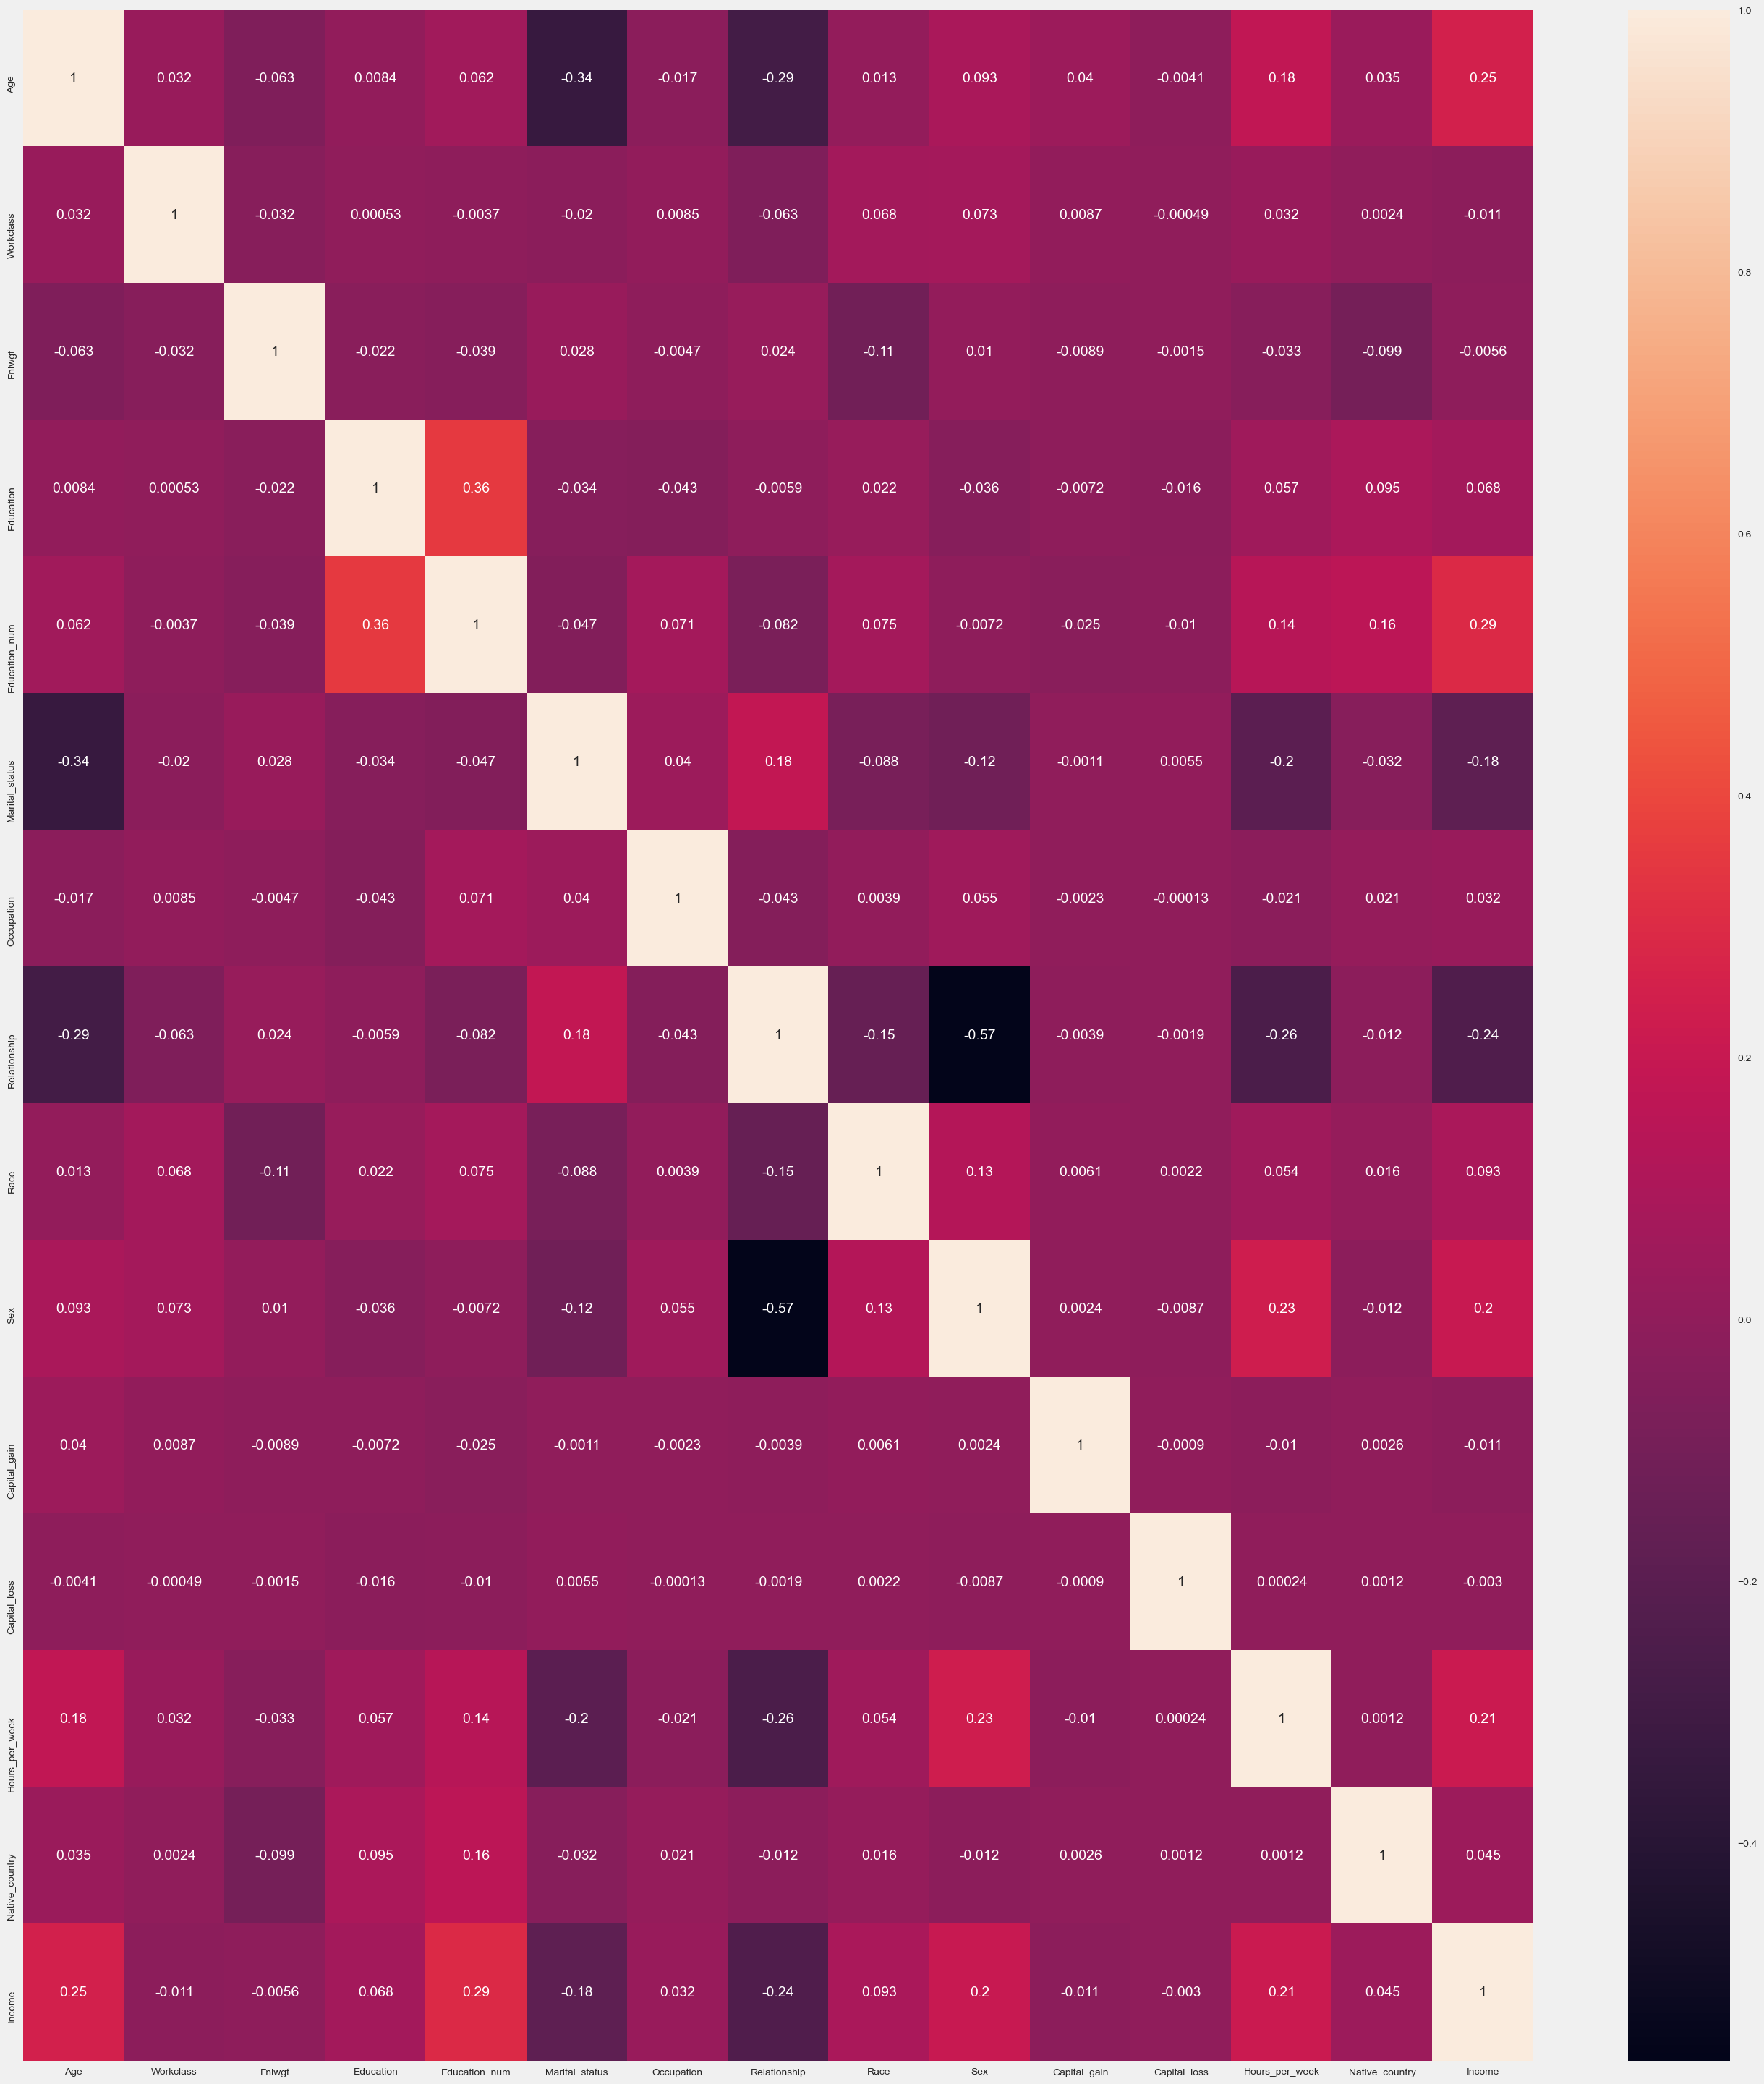

In [48]:
df_corr=df.corr()
plt.figure(figsize=(30,35))
sns.heatmap(df_corr,annot=True)
plt.plot()

### Feature Selection:

In [49]:
X = df.drop('Income', axis=1)
Y = df['Income']

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)
selector.fit(X, Y)
feature_imp = selector.feature_importances_

In [51]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 19.33
1 4.92
2 21.8
3 3.87
4 8.52
5 7.1
6 8.88
7 8.91
8 0.94
9 2.97
10 0.65
11 0.0
12 11.25
13 0.86


In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25925 entries, 0 to 32558
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             25925 non-null  float64
 1   Workclass       25925 non-null  int32  
 2   Fnlwgt          25925 non-null  float64
 3   Education       25925 non-null  int32  
 4   Education_num   25925 non-null  int64  
 5   Marital_status  25925 non-null  int32  
 6   Occupation      25925 non-null  int32  
 7   Relationship    25925 non-null  int32  
 8   Race            25925 non-null  int32  
 9   Sex             25925 non-null  int32  
 10  Capital_gain    25925 non-null  float64
 11  Capital_loss    25925 non-null  float64
 12  Hours_per_week  25925 non-null  float64
 13  Native_country  25925 non-null  int32  
dtypes: float64(5), int32(8), int64(1)
memory usage: 2.2 MB


Dropping Unnecessary columns , as these columns does not impact the output

In [53]:
X = X.drop([ 'Education', 'Race', 'Sex',
            'Capital_loss', 'Native_country'], axis=1)

In [54]:
from sklearn.preprocessing import StandardScaler

for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

#### Fixing imbalanced dataset using Oversampling

In [55]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
ros.fit(X, Y)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [56]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

1    50.0 %
0    50.0 %
Name: Income, dtype: object

#### Creating a train test split

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)


In [68]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (33428, 9)
X_test shape: (8358, 9)
Y_train shape: (33428,)
Y_test shape: (8358,)


In [69]:
lg=LogisticRegression()
gnb=GaussianNB()
sv=SVC()
rf=RandomForestClassifier(n_estimators=100)
ada = AdaBoostClassifier(n_estimators=100)
knn=KNeighborsClassifier()
dtc= DecisionTreeClassifier()

In [70]:
model = [lg,gnb,sv,rf,ada,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of ",m,"is:")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of  LogisticRegression() is:
0.7446757597511366
[[2991 1202]
 [ 932 3233]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.74      4193
           1       0.73      0.78      0.75      4165

    accuracy                           0.74      8358
   macro avg       0.75      0.74      0.74      8358
weighted avg       0.75      0.74      0.74      8358



Accuracy score of  GaussianNB() is:
0.7724335965541995
[[3061 1132]
 [ 770 3395]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      4193
           1       0.75      0.82      0.78      4165

    accuracy                           0.77      8358
   macro avg       0.77      0.77      0.77      8358
weighted avg       0.77      0.77      0.77      8358



Accuracy score of  SVC() is:
0.8117970806413017
[[3085 1108]
 [ 465 3700]]
              precision    recall  f1-score   support

           0       0.87      0.74      0

 RandomForestClassifier Model gives the highest Accuracy . Hence we will used it.

### Hyperparameter Tuning

In [71]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 40, stop = 150, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(40, 150, num = 10)]
max_depth.append(None)

criterion= ['gini', 'entropy']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criterion}
model = RandomForestClassifier()
rand_search = RandomizedSearchCV(estimator=model, param_distributions=random_grid,n_jobs=-1)

rand_search.fit(x_train, y_train)

print(rand_search.best_estimator_)
print(rand_search.best_score_)

RandomForestClassifier(max_depth=88, max_features='sqrt', n_estimators=88)
0.9191995016993726


In [72]:
Rfr = RandomForestClassifier(max_depth=40, n_estimators=40,max_features='sqrt')
Rfr.fit(x_train,y_train)
pred=Rfr.predict(x_test)
acc_sc= accuracy_score(y_test,pred)
print("accuracy score :",acc_sc*100)

accuracy score : 93.09643455372098


In [73]:
#Calculating the scores of different parameters
score=cross_val_score(Rfr,X_resampled,Y_resampled,cv=5,scoring='accuracy').mean()
print('Cross_val_score: ',score*100)
print('Mean Score: ',score.mean()*100)
print('STD Score: ',score.std())

Cross_val_score:  93.53851572660707
Mean Score:  93.53851572660707
STD Score:  0.0


####  ROC curve

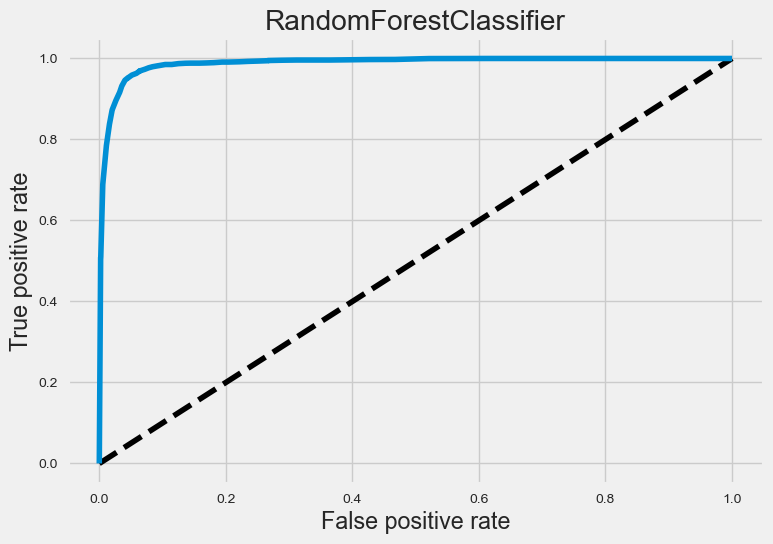

0.931152360777366

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Rfr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score=roc_auc_score(y_test,Rfr.predict(x_test))
auc_score

Here the auc roc score is 0.93 which is very good.

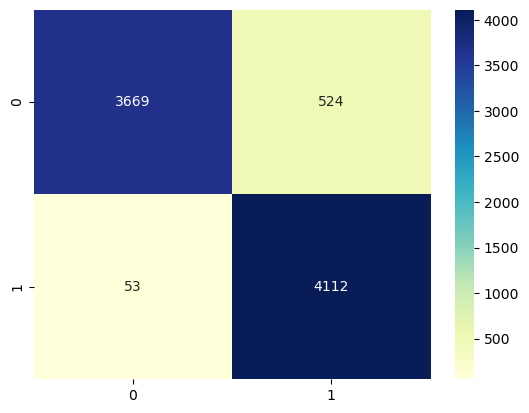

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


Here we can see that True Positive and are very high and False negative are very low i.e.53

In [80]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      4193
           1       0.89      0.99      0.93      4165

    accuracy                           0.93      8358
   macro avg       0.94      0.93      0.93      8358
weighted avg       0.94      0.93      0.93      8358



After the model evaluation , we get the precision and recall for both the target variable as 0.99 and 0.88. The f1- score of the model is 0.93. The ROC curve gave us the AUC score which is 0.93. Model evaluation gives the results that the prediction is very accurate.

### Saving the model

In [81]:
#saving the model
model=joblib.dump(Rfr,'Census_RFR.obj')

**Conclusion:**

- In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier, Adaboost classifier and Gaussian Naive Bayes

- A hyperparameter tuned random forest classifier gives the highest accuracy score of 93.09 and Auc roc score of 0.93.